In [1]:
#829 row is a str
import os, glob
import pandas as pd
import csv
import pprint as pprint
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from scipy.stats import linregress
%matplotlib inline

path = pd.read_csv("merged.csv")
path.head()

C:\Users\nadzema\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,67,68,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,151,152,155,156,159,160,167,168,171,172,175,176,177,179,180,183,184,187,188,191,192,195,196,199,200,201,203,204,207,208,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,29

,Unnamed: 0,id,Geographic Area Name,Estimate!!HOUSEHOLDS BY TYPE!!Total households,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Percent!!HOUSEHOLDS BY TYPE!!Total households,Percent Margin of Error!!HOUSEHOLDS BY TYPE!!Total households,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Margin of Error!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,Percent!!HOUSEHOLDS BY TYPE!!Total households!!Married-couple family,...,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a computer,Estimate!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,Percent Margin of Error!!COMPUTERS AND INTERNET USE!!Total households!!With a broadband Internet subscription,County,State
0,1,0500000US01003,"Baldwin County, Alabama",82325,3231,82325,(X),42253,3566,51.3,...,77281,3480,93.9,1.7,71352,3555,86.7,2.3,Baldwin County,Alabama
1,2,0500000US01015,"Calhoun County, Alabama",44636,2010,44636,(X),20571,1976,46.1,...,38833,2317,87.0,3.1,35353,2291,79.2,3.7,Calhoun County,Alabama
2,3,0500000US01043,"Cullman County, Alabama",32090,1233,32090,(X),17070,1332,53.2,...,27889,1303,86.9,2.7,26323,1391,82.0,3.8,Cullman County,Alabama
3,4,0500000US01049,"DeKalb County, Alabama",24880,1347,24880,(X),13623,1516,54.8,...,21513,1469,86.5,3.7,20393,1453,82.0,3.8,DeKalb County,Alabama
4,5,0500000US01051,"Elmore County, Alabama",30712,1330,30712,(X),16257,1636,52.9,...,27867,1566,90.7,3.0,25995,1677,84.6,3.9,Elmore County,Alabama


In [2]:
new_df = path[[ 'Geographic Area Name', "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree", 
               "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree",
              'Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size']]
new_df

,Geographic Area Name,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree,Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [3]:
clean_df = new_df.rename (columns= {"Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree":
                         "Estimate educational attainment Pop 25yrs> Assoc. Degree", 
                         "Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":
                         "Estimate educational attainment Pop 25yrs> Bachelor's Degree",
                        "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree": "Percent educational attainment Pop 25yrs> Assoc. Degree", 
                       "Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree":"Percent educational attainment Pop 25yrs> Bachelor's Degree"})
clean_df

,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [4]:
nick =[]
n=0
for item in clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"]:
    
    try:
        int(item)
        nick.append(int(item))
    except:
        print(item)
        print(n)
    n+=1

clean_df = clean_df.drop(829)
clean_df

Estimate!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associate's degree
829


,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09
...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89


In [5]:
clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"].astype(int)
clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]=clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"].astype(int)
clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"] = clean_df["Percent educational attainment Pop 25yrs> Assoc. Degree"].astype(float)
clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"] = clean_df["Percent educational attainment Pop 25yrs> Bachelor's Degree"].astype(float)
clean_df["Sum of Higher Education"] = clean_df["Estimate educational attainment Pop 25yrs> Assoc. Degree"] + clean_df["Estimate educational attainment Pop 25yrs> Bachelor's Degree"]
clean_df['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size'] = clean_df["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].astype(float)
clean_df["County"] = path["County"]
clean_df["State"] = path["State"]
clean_df

,Geographic Area Name,Estimate educational attainment Pop 25yrs> Assoc. Degree,Estimate educational attainment Pop 25yrs> Bachelor's Degree,Percent educational attainment Pop 25yrs> Assoc. Degree,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size,Sum of Higher Education,County,State
0,"Baldwin County, Alabama",16170,32781,10.1,20.5,3.36,48951,Baldwin County,Alabama
1,"Calhoun County, Alabama",7112,9082,9.0,11.5,3.06,16194,Calhoun County,Alabama
2,"Cullman County, Alabama",6783,5935,11.5,10.1,3.00,12718,Cullman County,Alabama
3,"DeKalb County, Alabama",4433,3693,9.4,7.9,3.62,8126,DeKalb County,Alabama
4,"Elmore County, Alabama",5821,9418,10.1,16.4,3.09,15239,Elmore County,Alabama
...,...,...,...,...,...,...,...,...,...
3967,"Sweetwater County, Wyoming",3374,4136,12.1,14.8,3.32,7510,Sweetwater County,Wyoming
3968,"Teton County, Wyoming",775,6747,4.5,38.9,3.01,7522,Teton County,Wyoming
3969,"Uinta County, Wyoming",1351,1433,10.4,11.1,3.23,2784,Uinta County,Wyoming
3970,"Washakie County, Wyoming",560,854,10.1,15.4,2.89,1414,Washakie County,Wyoming


In [6]:
#state_ed = clean_df.groupby('State').sum('Sum of Higher Education')
state_ed = clean_df.groupby('State')["Percent educational attainment Pop 25yrs> Bachelor's Degree"].mean()
house_ed = clean_df.groupby('State')["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"].mean()
state_ed = state_ed.reset_index()
house_ed = house_ed.reset_index()
state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"] = house_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
state_ed = state_ed.sort_values(by=['Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size'])
state_ed = state_ed.reset_index()
state_ed

,index,State,Percent educational attainment Pop 25yrs> Bachelor's Degree,Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size
0,19,Maine,18.068182,2.821818
1,45,Vermont,20.620000,2.848667
2,49,Wisconsin,17.081053,2.892316
3,27,Nebraska,16.407292,2.894688
4,15,Iowa,16.222018,2.899174
5,34,North Dakota,18.100000,2.906667
6,29,New Hampshire,21.162500,2.928750
7,22,Michigan,15.122321,2.938750
8,38,Pennsylvania,15.646729,2.951308
9,23,Minnesota,17.986275,2.958431


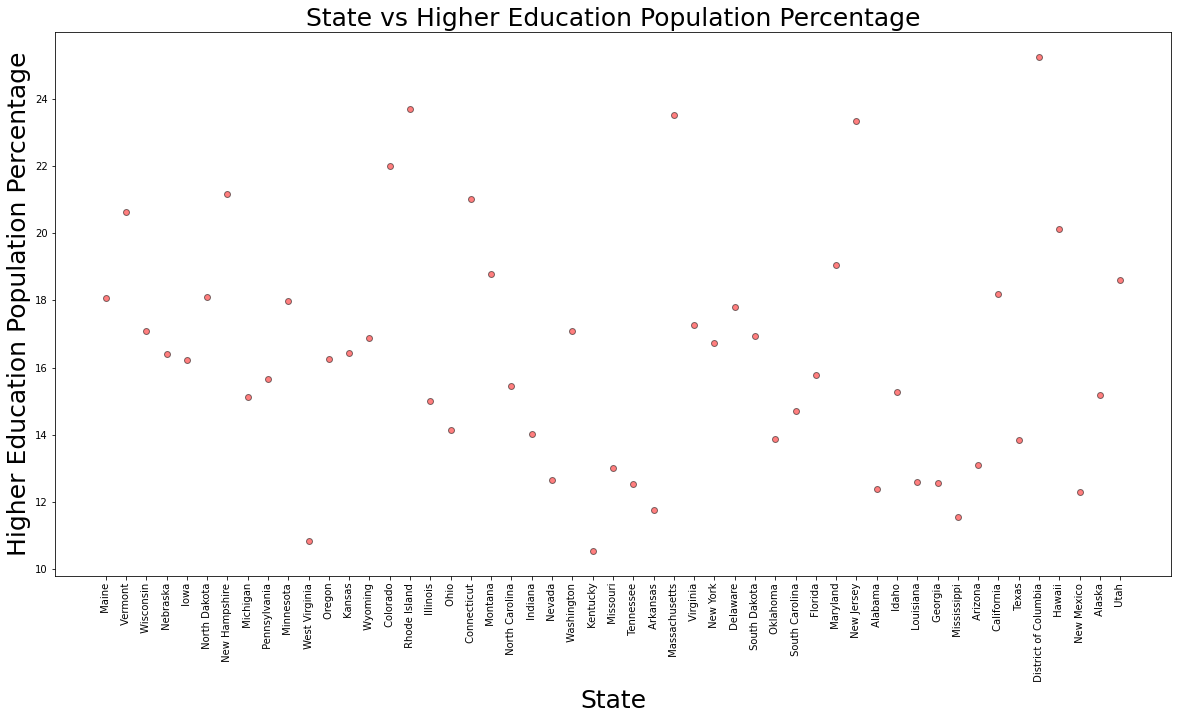

In [7]:
#State vs higher ed scatterplot
x = state_ed["State"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(20,10))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.5)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('State', fontsize=25)
plt.ylabel('Higher Education Population Percentage', fontsize=25)
plt.title('State vs Higher Education Population Percentage', fontsize=25)
plt.show()

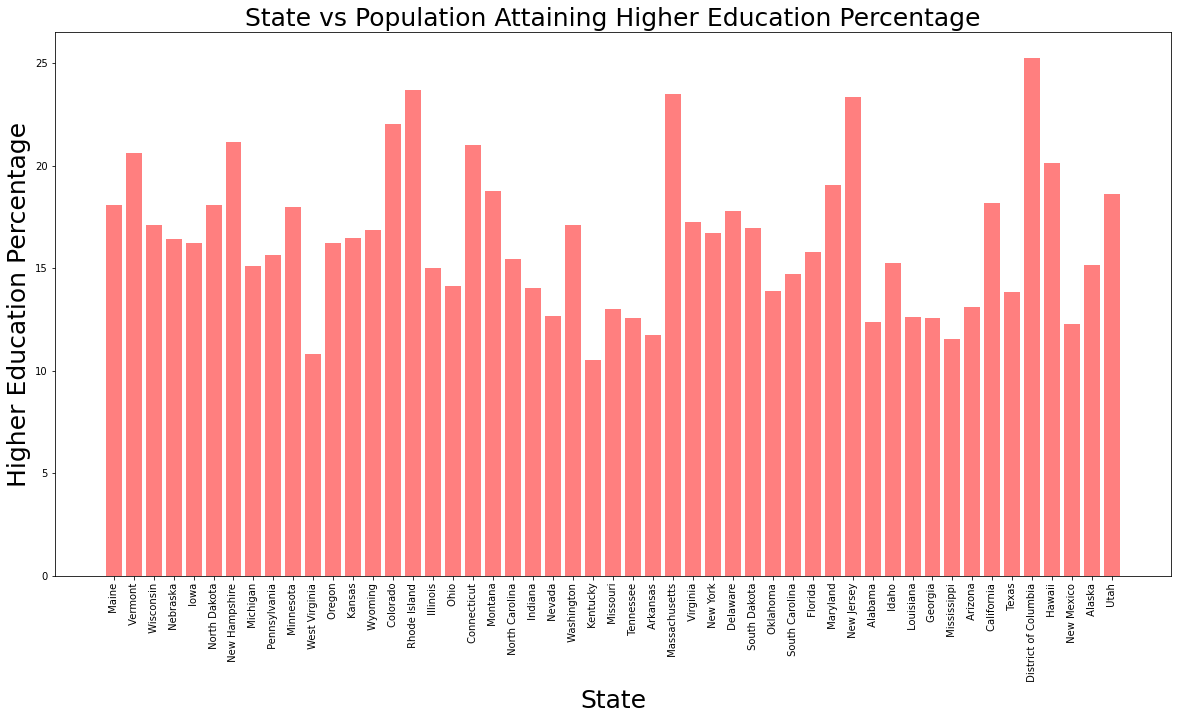

In [8]:
#State vs Percent Population attaining higher education
x = state_ed["State"]
x_axis = np.arange(len(x))
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(20,10))
plt.bar(x_axis, y, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('State', fontsize=25)
plt.ylabel('Higher Education Percentage', fontsize=25)
plt.title('State vs Population Attaining Higher Education Percentage', fontsize=25)
plt.show()

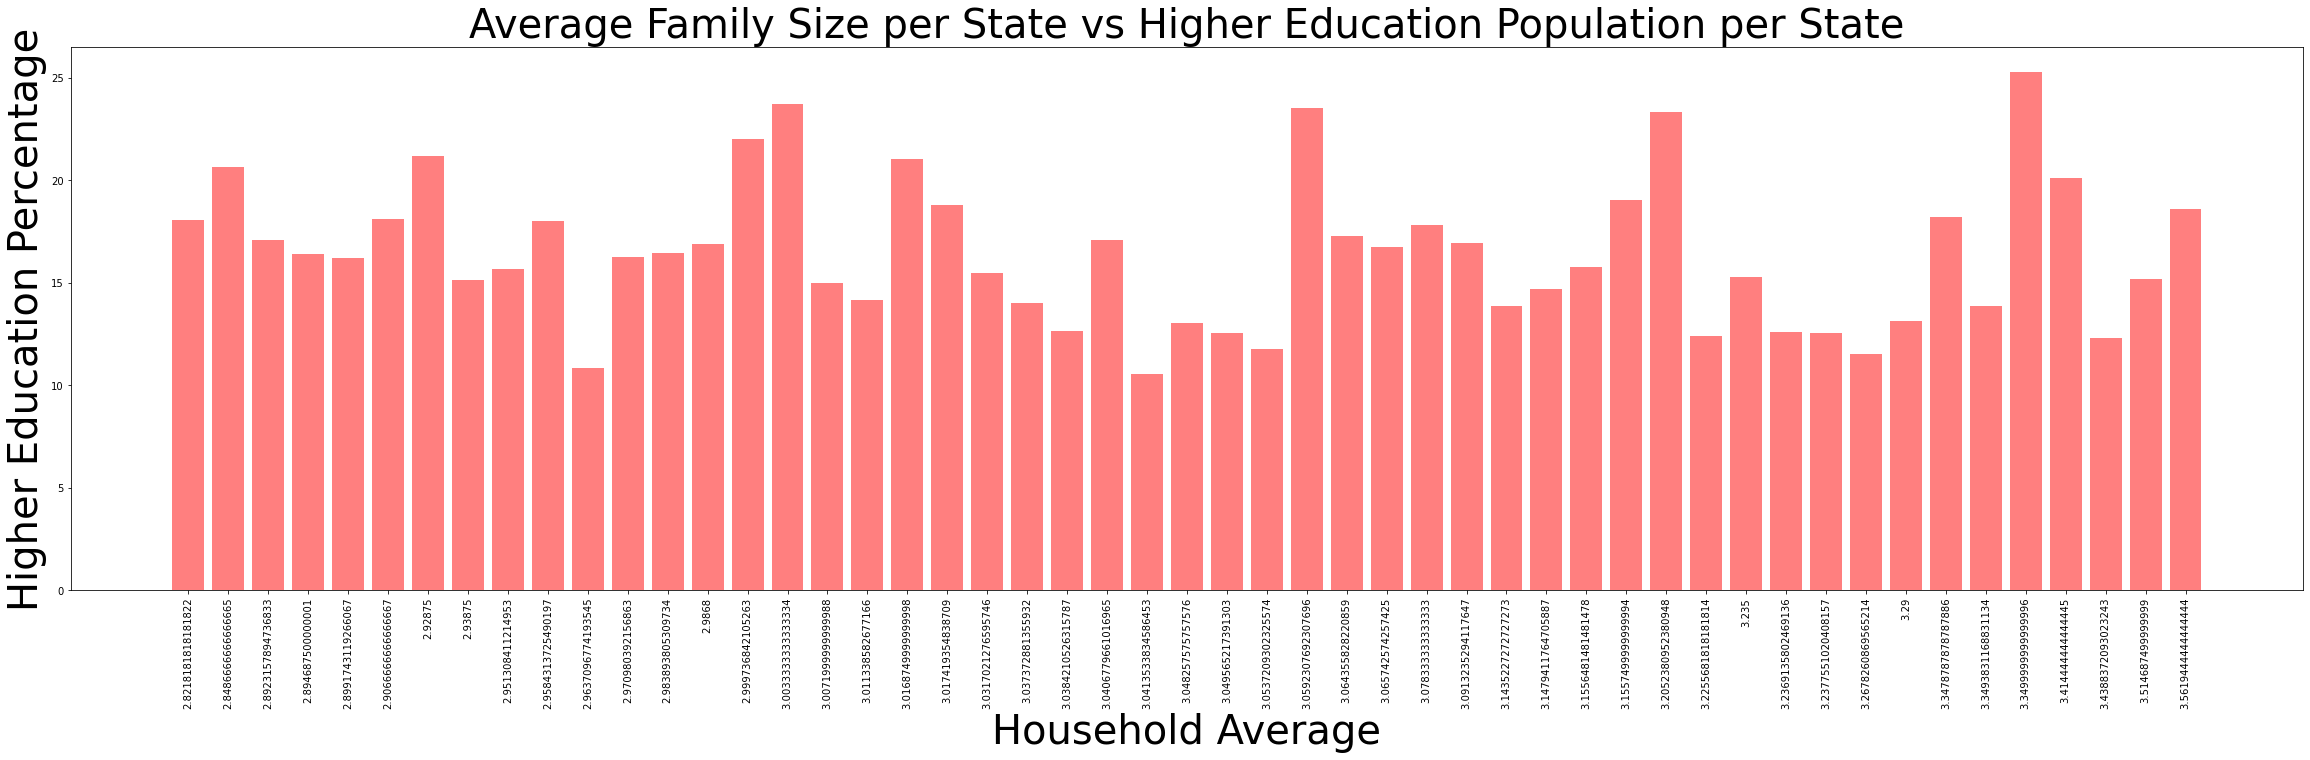

In [9]:
#Household avg. vs Percent Population attaining higher education by state bar chart
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
x_axis = np.arange(len(x))
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(40,10))
plt.bar(x_axis, y, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x, rotation="vertical")
plt.xlabel('Household Average', fontsize=40)
plt.ylabel('Higher Education Percentage', fontsize=40)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=40)
plt.show()

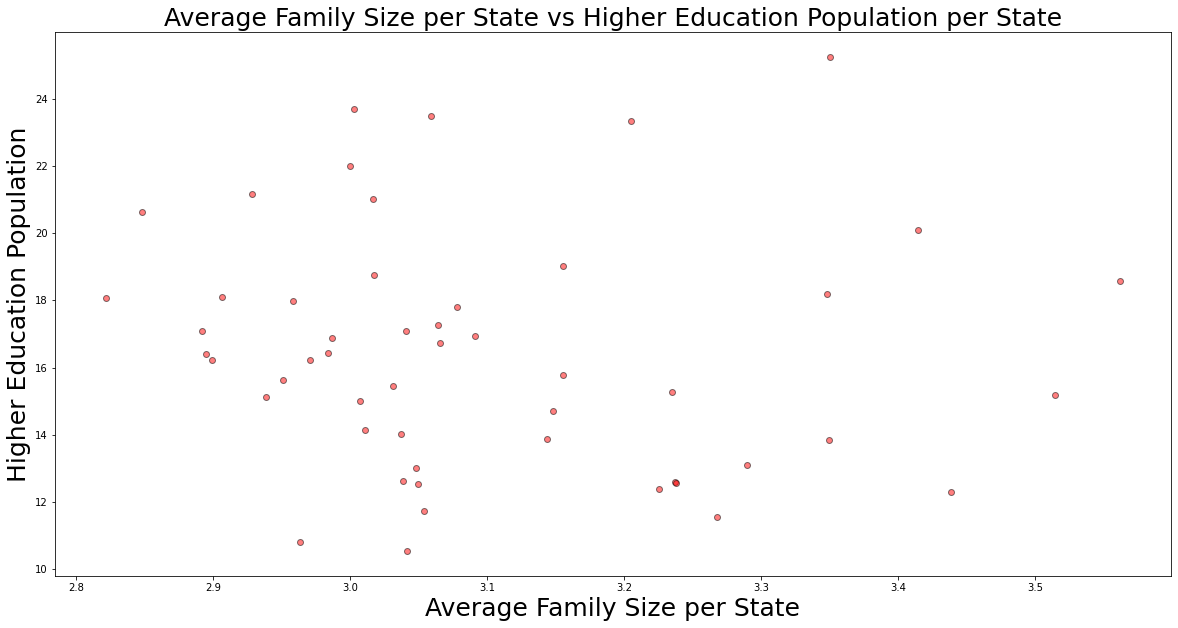

In [10]:
#Household avg. vs Percent Population attaining higher education by state scatterplot
x = state_ed["Estimate!!HOUSEHOLDS BY TYPE!!Total households!!Average family size"]
y = state_ed["Percent educational attainment Pop 25yrs> Bachelor's Degree"]
plt.figure(figsize=(20,10))
plt.scatter(x, y, marker = 'o', facecolors ='red', edgecolors='black', alpha = 0.5)
x_axis = np.arange(len(x))
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, state_ed["State"], rotation="vertical")
plt.xlabel('Average Family Size per State', fontsize=25)
plt.ylabel('Higher Education Population', fontsize=25)
plt.title('Average Family Size per State vs Higher Education Population per State', fontsize=25)
plt.show()

In [11]:
#end code